In [ ]:
import numpy as np
import math
from matplotlib import pylab as plt
%matplotlib inline

In [ ]:
#filename of csv file
plscatfile='2019psrcat.csv'

# Pulsar Sensitivity

## Antenna Gain

The conversion from temperature to flux density involves the gain introduced by the collecting area of the dish itself, referred to as *antenna gain*, which is given by

\begin{equation}
  G = \frac{\eta A}{2 \text{k}} \times 10^{-26} \approx \frac{\eta A}{2761}, \quad \text{[K / Jy]}
\end{equation}

where $\eta$ is the efficiency of the dish (less than 1!), $A$ is the dish area in square metres and $\text{k}$ is Boltzmann's constant.

## Minimum detectable flux and S/N


The mean flux is given by
\begin{equation}
S_{mean} = \frac{(S/ N) \space T_{sys}}{G  N_{ant}  \sqrt{n_{p}t_{int} B} }\sqrt{\dfrac{W}{P-W}}
\end{equation}

(see Lorimer, D. R., & Kramer, M. 2005, Handbook of Pulsar Astronomy (Cambridge: Cambridge Univ. Press) equation A1.21)

* $S_{mean}$ is the mean flux density of the pulsar in Jy
* $S/N$ is the signal to noise ratio of the folded pulse profile
* $T_{sys}$ is the system temperature - this should include contributions from the sky and the receiver
* $G$  is the antenna gain of one antenna in $Jy.K^{-1}$
* $N_{ant}$ is the number of antennas
* $n_{p}$ is the number of polarizations
* $t_{int}$ is the integration time in s
* $B$ is the bandwidth in MHz
* P is the pulsar period in seconds
* W is the pulse width in seconds

If a known pulsar of flux S is observed with $N_{ant}$ $\times$ antennas for $t_{int}$ seconds then the observed snr is 



\begin{equation}
^S/_N =\dfrac {S_{\nu}}{T_{sys}}{G  N_{ant}  \sqrt{n_{p}t_{int} B} }\sqrt{\dfrac{P-W}{W}}
\end{equation}

Sometimes it is written in terms of SEFD

\begin{equation}
{SEFD}=\dfrac{T_{sys}}{G}
\end{equation}

The uncertainty in an arrival time is 
\begin{equation}
\delta_{TOA} = \dfrac{W}{^S/_N}
\end{equation}



## Flux and Spectral Index

The flux of a pulsar, $S_{\nu}$ varies with observing frequency, $\nu$ as

\begin{equation}
S_{\nu} \propto \nu^{\alpha}
\end{equation}

where $\alpha$ is the spectral index.

Most pulsars have a spectral index, $\alpha = -1.4$.

The pulsar catalog contains fluxes at observing frequencies of 1400 MHz and 400 MHz.

The flux at the observing frequency, $\nu$ can be calculated from the flux at 1400 MHz, $S_{1400}$ and the spectral index, $\alpha$.

\begin{equation}
S_{\nu} = S_{1400} \times \left( \dfrac{\nu}{1400} \right) ^{\alpha}
\end{equation}

## ATNF pulsar catalogue

The ATNF pulsar catalogue contains details of all published pulsars.

http://www.atnf.csiro.au/people/pulsar/psrcat/

I did this using the command

psrcat -nonumber -nohead -o short -c 'JNAME RAJD DECJD P0 P1 W50 S1400 DM' -l "(decj<44) &&(S1400>0)&&(W50>0)" > 2016psrcat.csv




In [ ]:
print (plscatfile)

The table consists of the following columns

    0. PSRJ: Pulsar Jname
    1. P0 Barycentric period of the pulsar (sec)
    2. P1	Period derivative
    3. W50	Width of pulse at 50% (sec)
    4. S1400 Flux at 1400MHz (mJy)
    5. DM Dispersion measure (cm^{-3} pc)
    6. SPINDX - spectral index



In [ ]:
names=np.genfromtxt('2019psrcat.csv',unpack=True,dtype=str,delimiter=",",skip_header=1,usecols=(0))
data=np.genfromtxt('2019psrcat.csv',names=True,unpack=True,delimiter=",",usecols=(1,2,3,4,5,6))

The data consists of the following

    0. names: Pulsar Jname
    1. data[P0] Barycentric period of the pulsar (sec)
    2. data[P1]	Period derivative
    3. data[W50]	Width of pulse at 50% (sec)
    4. data[S1400] Flux at 1400MHz (mJy)
    5. data[DM] Dispersion measure (cm^{-3} pc)
    6. data[SPINDX] - spectral index

- What is the longest Period pulsar in the catalog?
- What is the shortest Period pulsar in the catalog?

In [ ]:
NPsrs=len(data['P1'])
print ("Number of pulsars above horizon = %i") %NPsrs

## Step 1: Plot P-Pdot plot

In [1]:
#Set up a log-log plot for P vs Pdot
figure=plt.figure(figsize=(15,10))
plt.ylabel("log Pdot")
plt.xlabel("log (Period/[s])")

plt.xscale('log')
plt.yscale('log')

# plot 


NameError: name 'plt' is not defined

## Pulsars observable

Plot out the pulsars in the P-Pdot diagram that can be observed with KAT-7 then AR1 in 10 min with a minimum S/N = 10 / 100. 

Plot observable pulsars in green and non-observable pulsars in red.

## Step 2: Find the flux using the spectral index

In [ ]:
# Find the flux at the cfreq using the spectral index
cfreq=1284



## Step 3: Set up observing parameters - done for you

In [ ]:
# choose a minimum integration time and a minimum detectable signal-to-noise threshold
#For MeerKAT
B = 856                 # Bandwidth in MHz
Tsys = 18               # System temperature
NAnt = 64              # number of antennas
Npol = 2
e = 0.8                 # assume an aperature effeciency of 80%
d = 13.5                # dish diameter
cfreq = 1284            # centre frequency of observation


## Step 4: Calculate the Gain

In [2]:
# calculate the gain of one meerkat dish

## Step 5: Find the expected snr for each pulsar in catalogue

In [ ]:
# calculate the S/N for each source in the catalogue use the flux at the cfreq
# use the values for the period and pulse width from the catalogue

# assume an integration time of 200s
Tint=200

SNR=


## Step 6: Plot the pulsars (green for observable, red for not observable)

In [3]:
# The pulsar is observable if SNR > SNmin

SNmin=100

# boolean array
observable = np.where(SNR>=SNmin)
notobservable = np.where(SNR<SNmin)


#Set up a log-log plot for P vs Pdot
figure=plt.figure(figsize=(15,10))
plt.title("Observable")
plt.ylabel("log Pdot")
plt.xlabel("log (Period/[s])")
plt.yscale('log')
plt.xscale('log')

    
plt.plot(data['P0'][observable],data['P1'][observable],'g.')
plt.plot(data['P0'][notobservable],data['P1'][notobservable],'r.')

NameError: name 'np' is not defined

# Try the following
- change the number of dishes to 32
- change the observable bandwidth - why do you think that this might be more realistic

# Fraction of pulsars observable with observing time

In [ ]:
# calculate fraction of pulsars with S/N > SNmin observable as a function of observing time

SNmin = 100
figure=plt.figure(figsize=(15,10))
plt.title("Fraction of pulsars observable as a function of observing time")
plt.ylabel("Observable fraction")
plt.xlabel("Integration time /[s])")

#set up an array containing possible integration times
Tvals = np.arange(10,3610,10)    # array containing integration times

ObsFraction=[]

for index in range(len(Tvals)):
    T_i = Tvals[index]
        
    # calculate the SNR each pulsars assuming an integration time of T_i

        
   
    SNR=
    

    # array with all pulsars with flux greater than minimum detectable flux
    obs_i = np.where(SNR>=SNmin)

    # calculate fraction of pulsars that are observable to array
    ObsFraction.append((len(obs_i[0])/float(NPsrs)))
        
plt.plot(Tvals,ObsFraction)


## PPdot diagram

Rotational power loss:
$${dE_{\rm rot} \over d t} = {- 4 \pi^2 I \dot{P} \over P^3}\rlap{\quad}$$

Minimum magnetic field strength:
$$\biggl( {B \over {\rm Gauss}} \biggr) > 3.2 \times 10^{19} \biggl( { P \dot{P} \over {\rm s} } \biggr)^{1/2}\rlap{\quad
}$$

The characteristic age of a pulsar is defined by
$$ \tau \equiv { P \over 2 \dot{P}}\rlap{\quad}$$

In [ ]:
# on the P Pdot diagram plot lines for characteristic age
#100 kyr, 1Myr, 10 Myr, 100 Myr

# plot lines for B = 10^11, 10^14 Gauss



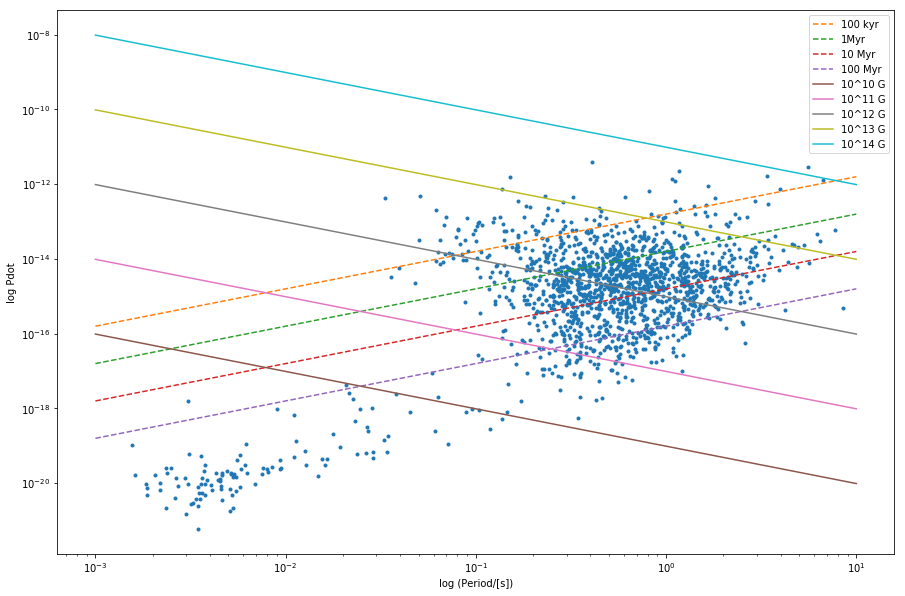

In [ ]:
PValues=np.logspace(-3, 1, num=50, endpoint=True, base=10.0, dtype=None)


In [ ]:
#Set up a log-log plot for P vs Pdot
figure=plt.figure(figsize=(15,10))
plt.ylabel("log Pdot")
plt.xlabel("log (Period/[s])")
plt.yscale('log')
plt.xscale('log')


Tau=[1E5,1E6,1E7,1E8]
TauLabel=['100 kyr', '1Myr', '10 Myr', '100 Myr']

for i in range(len(Tau)):
    # for each Tau calculate the pdot value corresponding to each p value
    
B=[1E10,1E11,1E12,1E13,1E14]
BLabel=['10^10 G', '10^11 G', '10^12 G', '10^13 G' , '10^14 G']
for i in range(len(B)):
    # for each B calculate the pdot value corresponding to each p value
     
plt.legend()